In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [2]:
Dataset = pd.read_csv("Bank 2011.csv", delimiter=';')
Dataset.drop(columns="Duration", axis=1, inplace=True)

In [3]:
print("Danh sách các cột, số lượng thông tin và kiểu dữ liệu")
print(f"{'Tên cột':<20}{'Tổng':<10}{'Thiếu':<10}{'Kiểu cột'}")
for Col in Dataset.columns:
    Sum = Dataset.shape[0]
    Null = Dataset[Col].isnull().sum()
    print(f"{Col:<20}{Sum:<10}{Null:<10}{Dataset[Col].dtype}")

Danh sách các cột, số lượng thông tin và kiểu dữ liệu
Tên cột             Tổng      Thiếu     Kiểu cột
Age                 45211     0         int64
Job                 45211     0         object
Marital             45211     0         object
Education           45211     0         object
Default             45211     0         object
Balance             45211     0         int64
Housing             45211     0         object
Loan                45211     0         object
Contact             45211     0         object
Day                 45211     0         int64
Month               45211     0         object
Campaign            45211     0         int64
Pdays               45211     0         int64
Previous            45211     0         int64
Poutcome            45211     0         object
Y                   45211     0         object


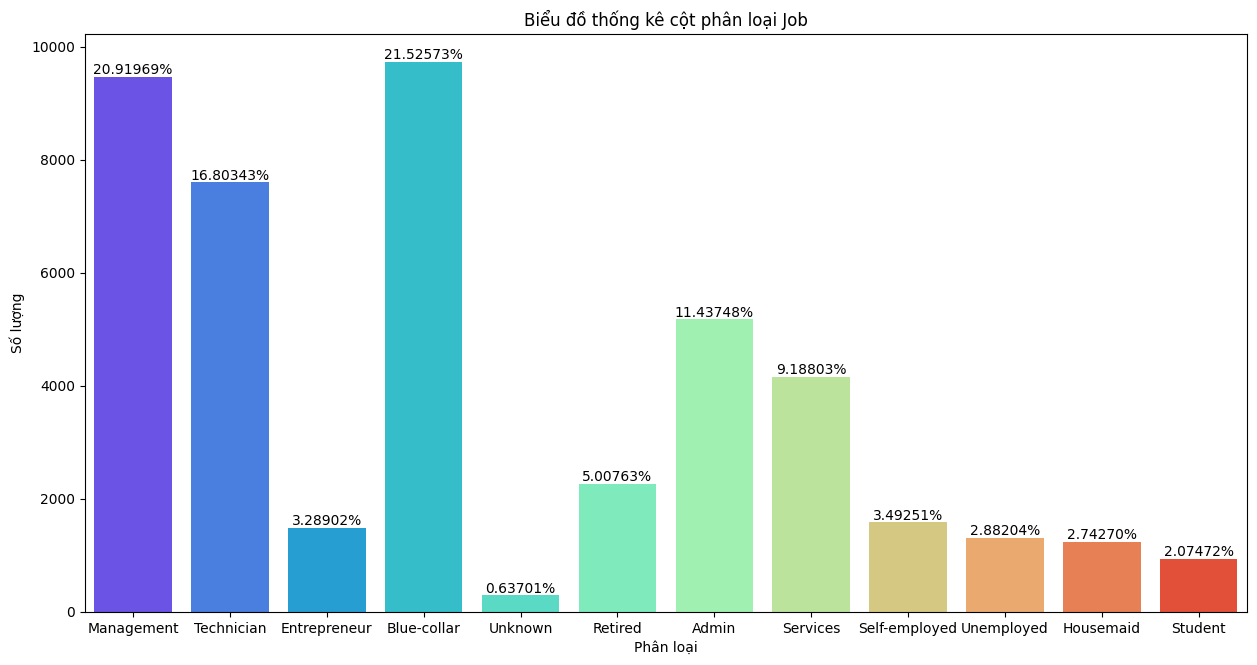

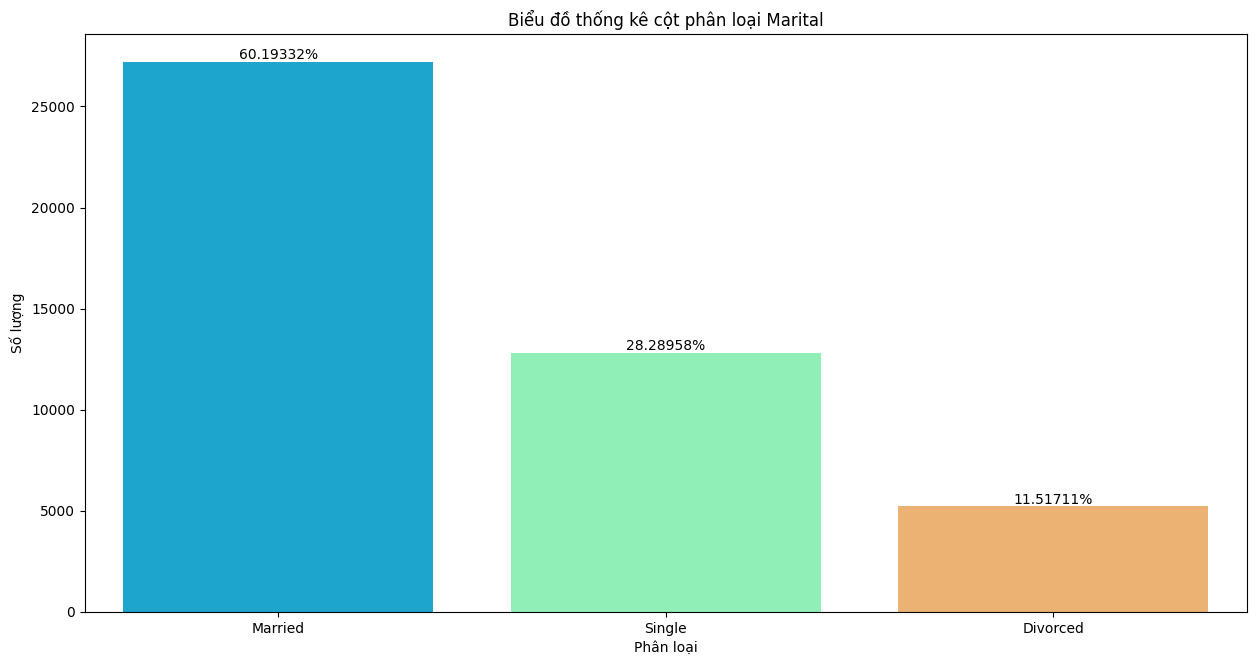

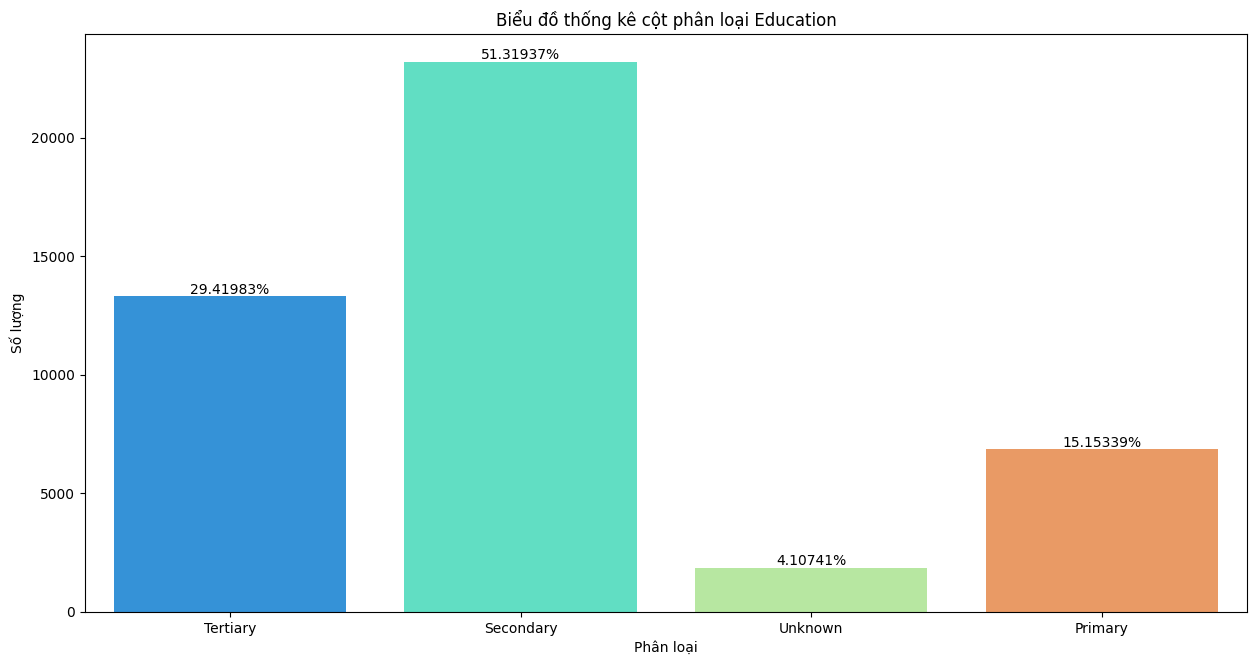

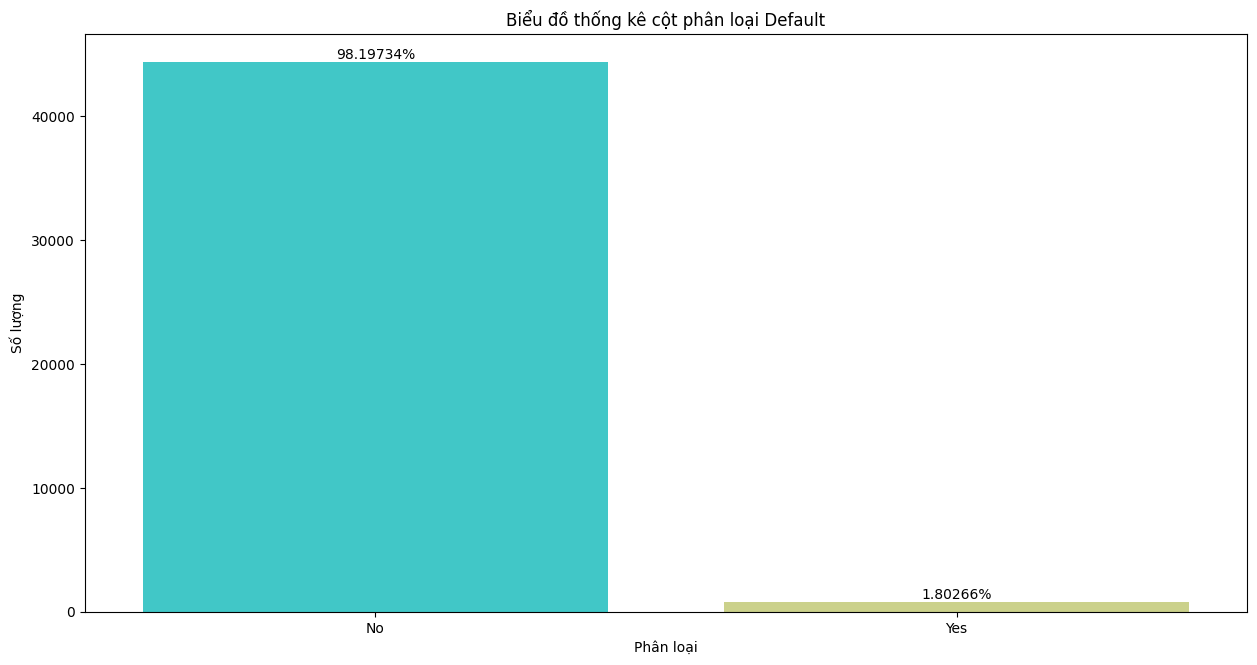

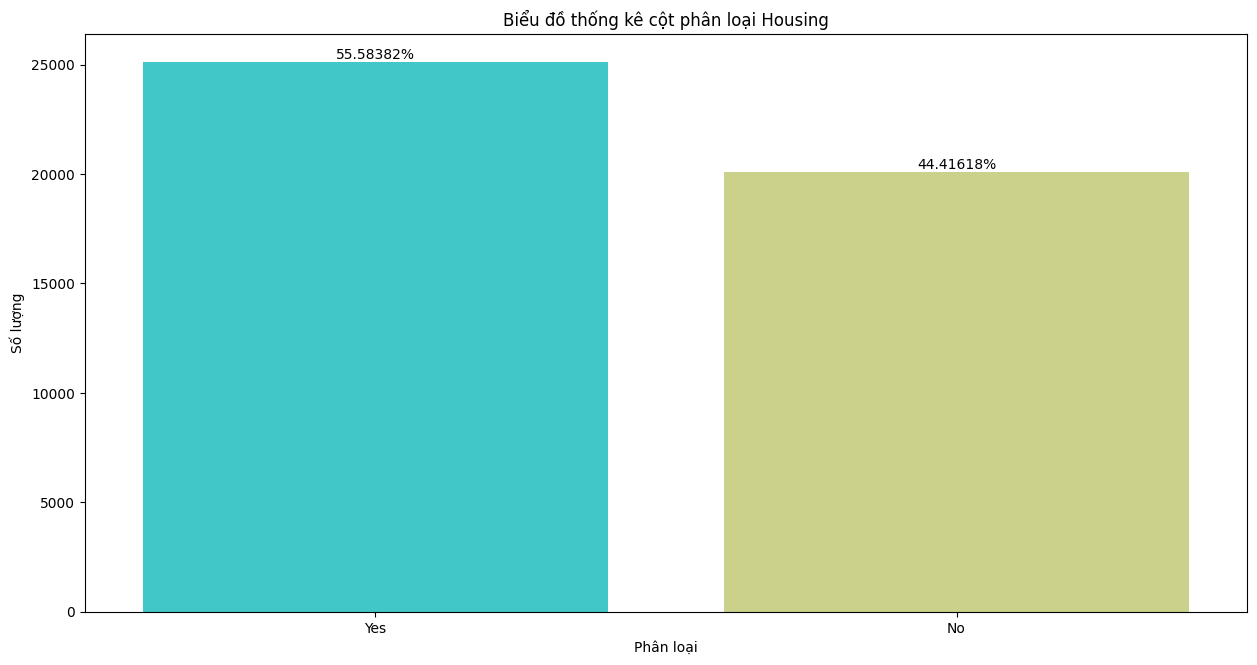

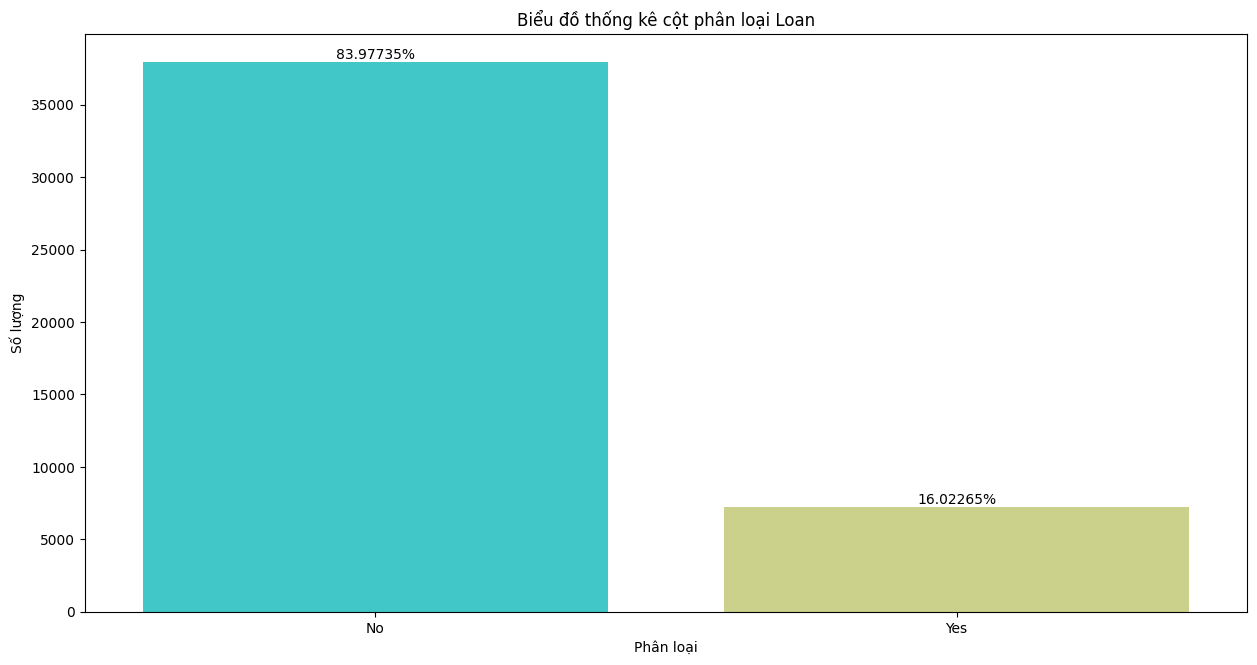

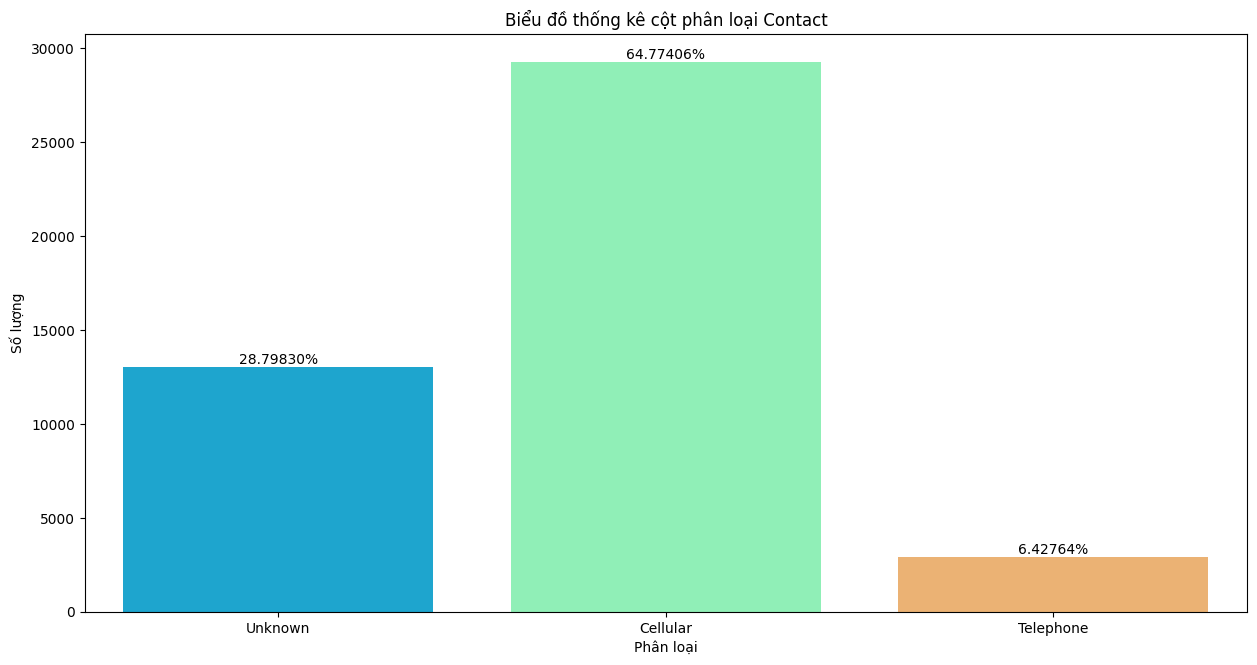

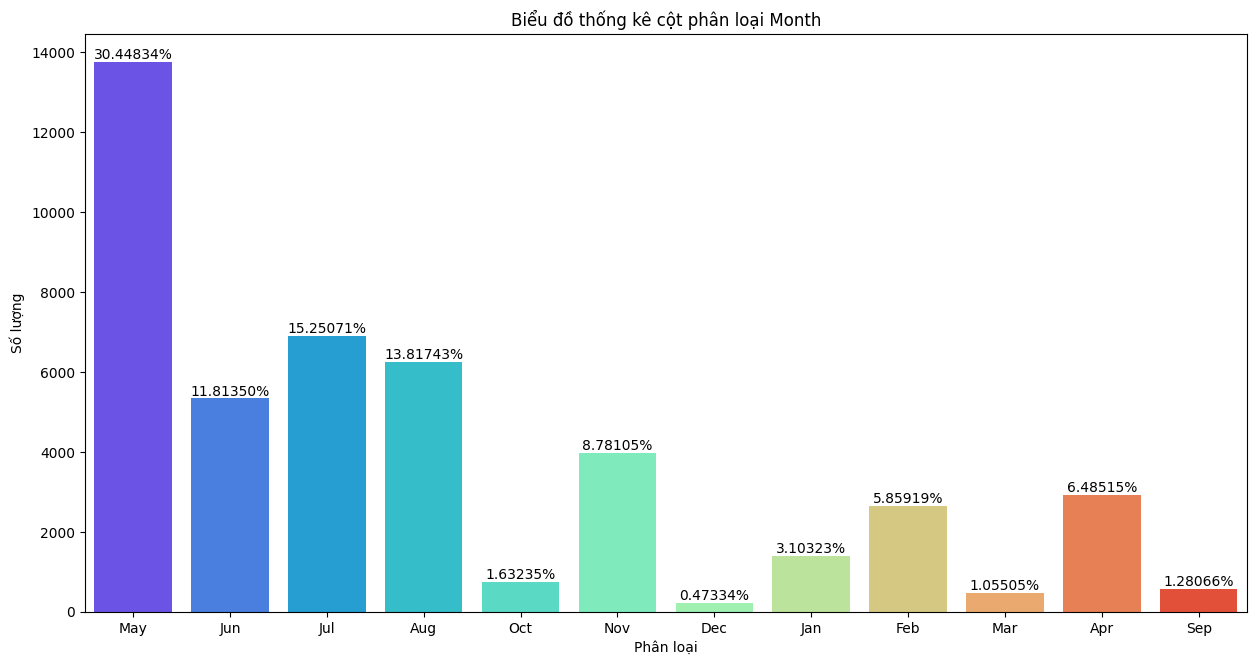

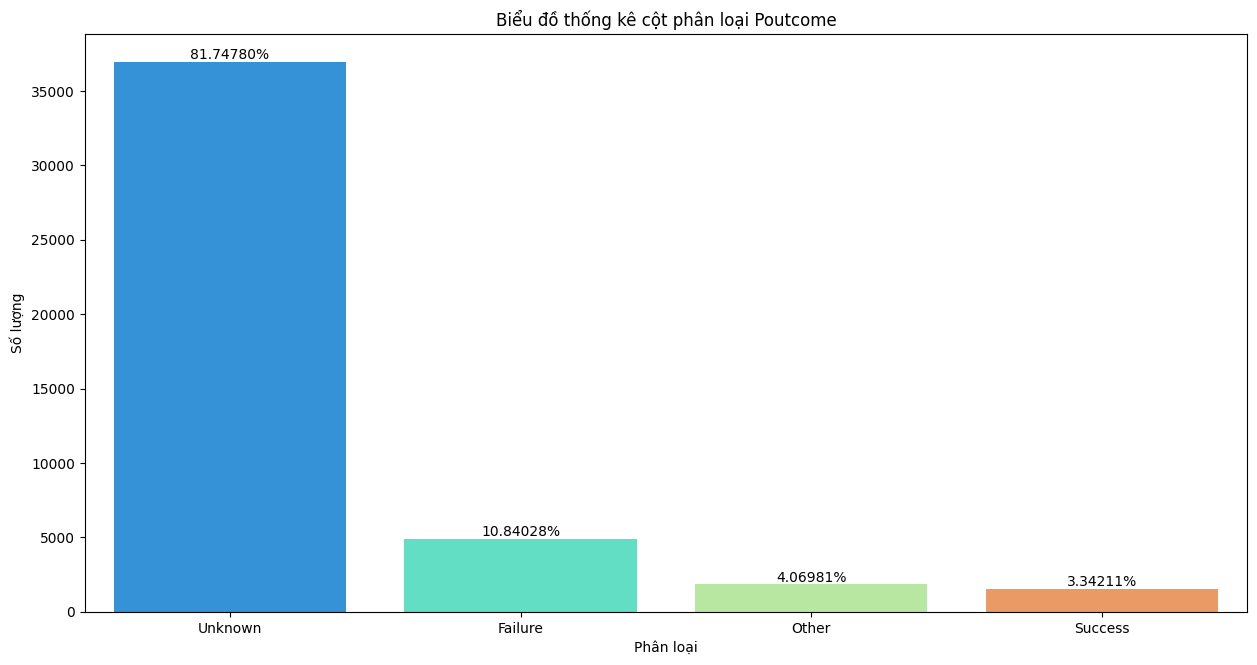

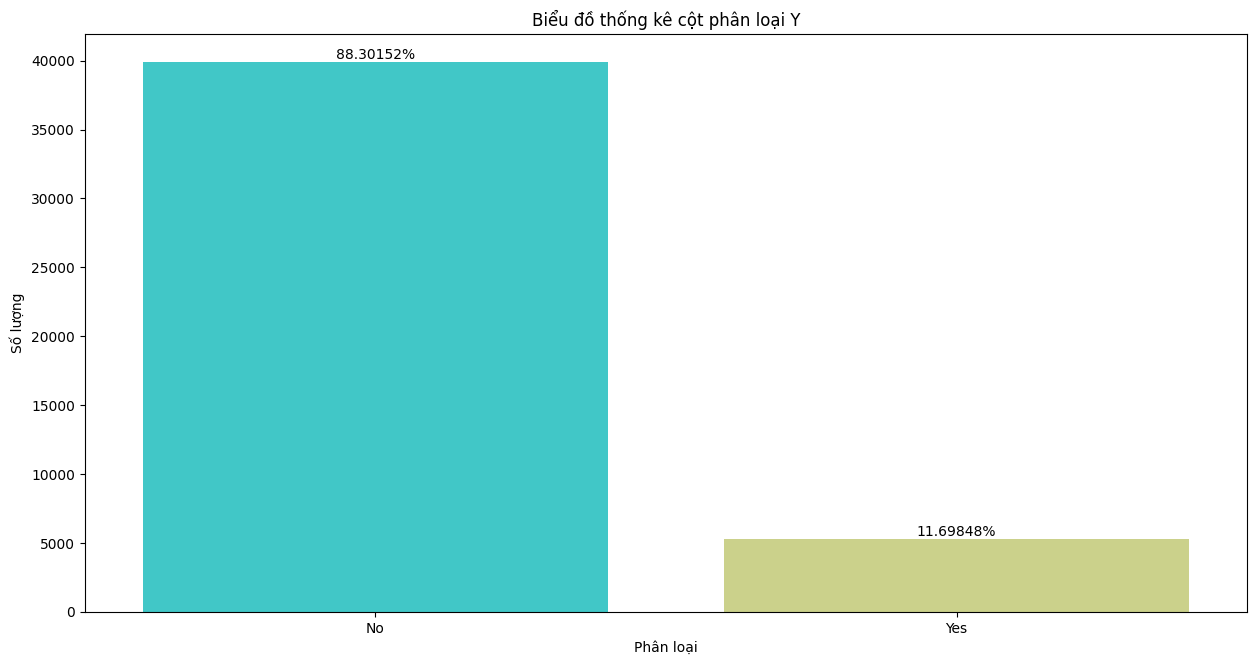

In [4]:
Categorical = [Col for Col in Dataset.columns if Dataset[Col].dtype == 'object']
for Col in Categorical:
    plt.figure(figsize=(15, 7.5))
    plt.title(f"Biểu đồ thống kê cột phân loại {Col}")
    sns.countplot(data=Dataset, x=Col, hue=Col, palette='rainbow', legend=False)  
    plt.xlabel("Phân loại")
    plt.ylabel("Số lượng")
    Total = len(Dataset[Col])
    Axes = plt.gca()
    for Each in Axes.patches:
        Percentage = f"{100 * Each.get_height()/Total:.5f}%"
        x, y = Each.get_x() + Each.get_width()/2, Each.get_height()
        Axes.annotate(Percentage, (x, y), ha='center', va='bottom')
    plt.show()

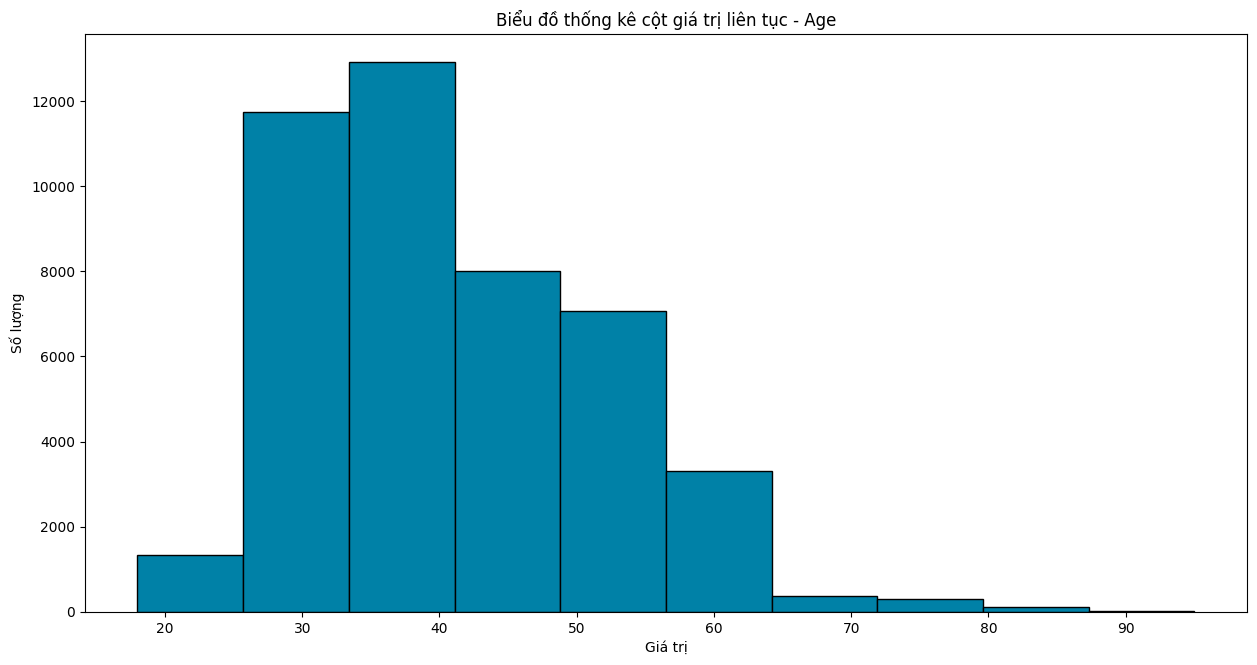

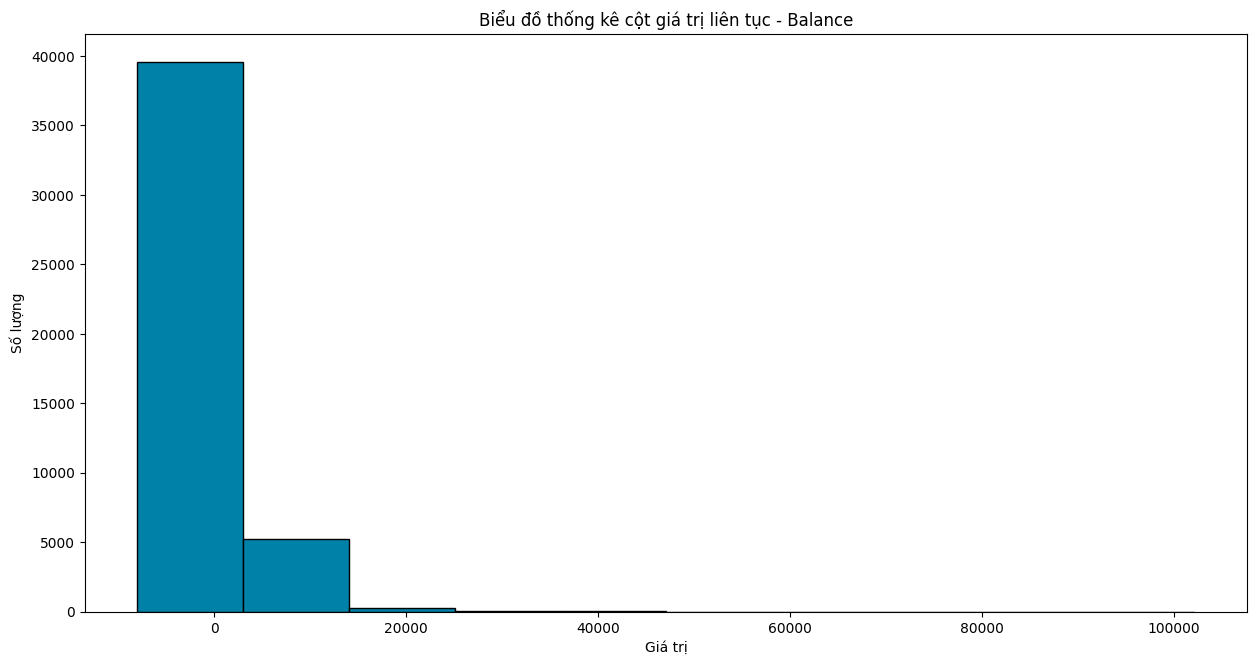

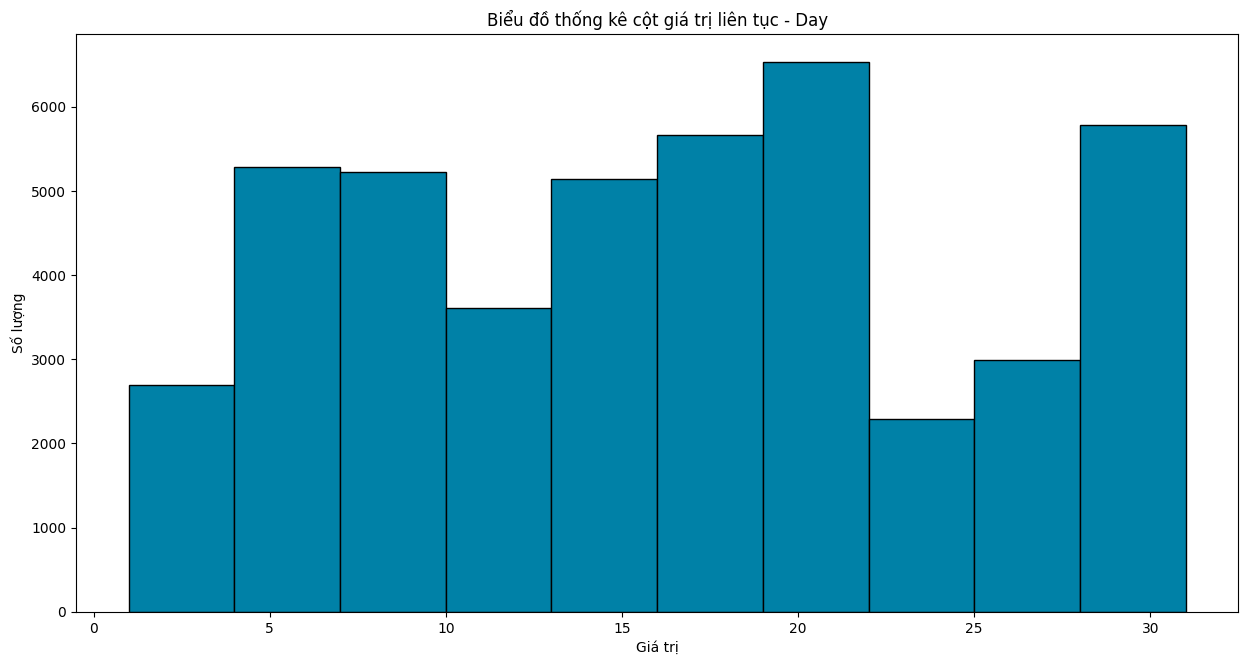

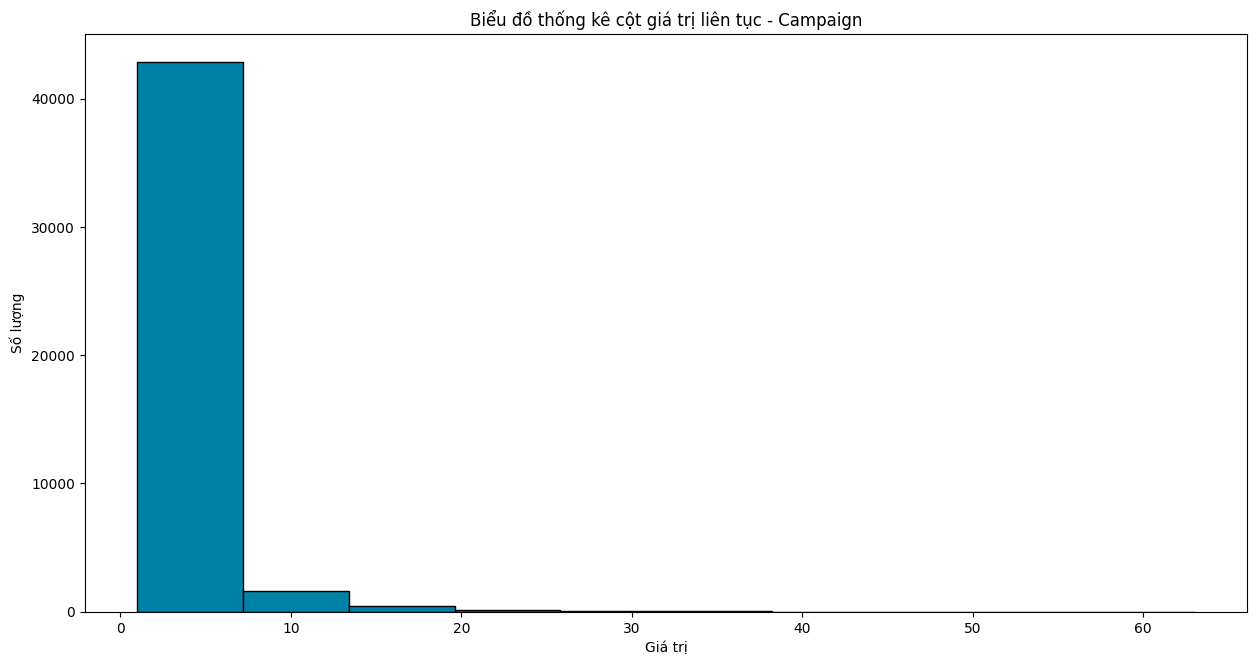

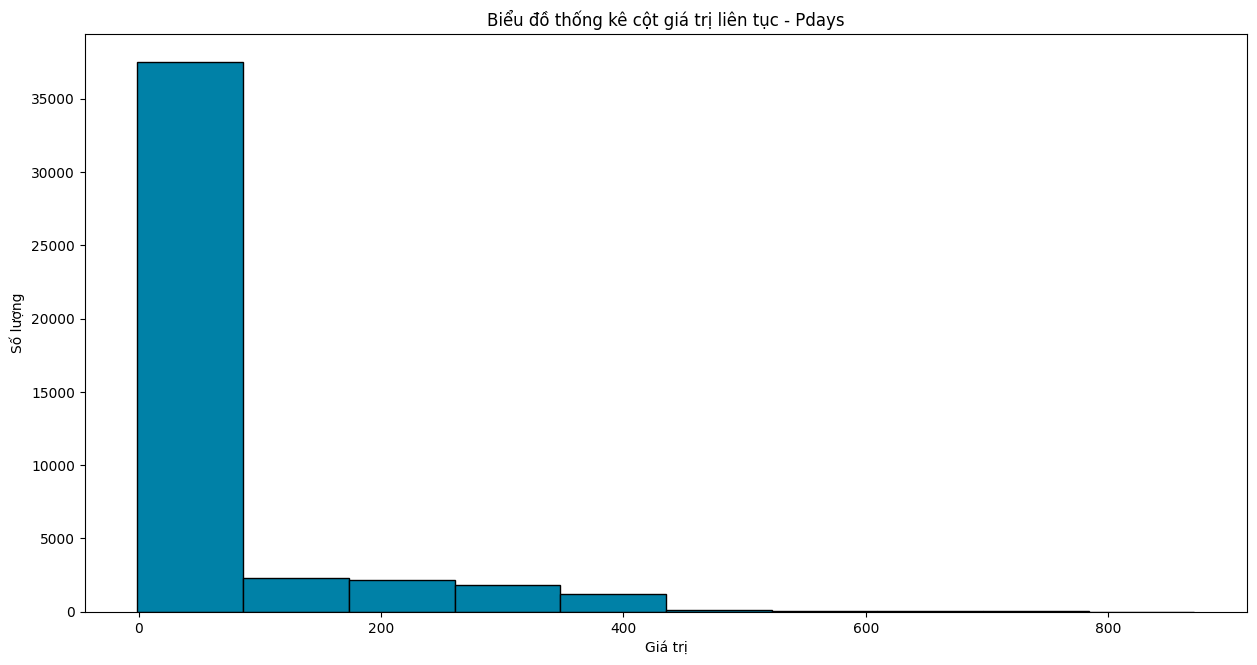

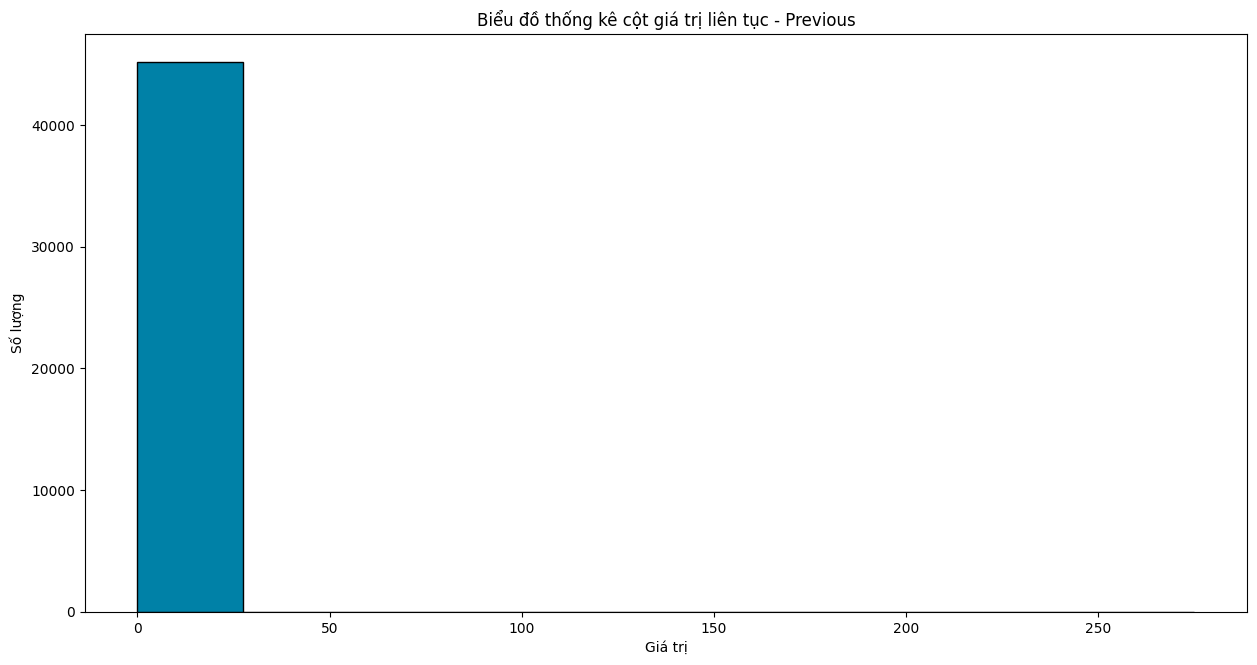

In [5]:
Numeric = [Col for Col in Dataset.columns if Dataset[Col].dtype != 'object']
for Col in Numeric:
    plt.figure(figsize=(15, 7.5))
    plt.title(f"Biểu đồ thống kê cột giá trị liên tục - {Col}")
    plt.hist(Dataset[Col], edgecolor='black', color='#0081A7')
    plt.xlabel("Giá trị")
    plt.ylabel("Số lượng")
    plt.show()

In [6]:
Dataset['Pdays'] = Dataset['Pdays'].replace(-1, 0)

In [7]:
def Convert_Month(Row):
    if Row['Month']=='Jan': 
        return 1
    elif Row['Month']=='Feb': 
        return 2
    elif Row['Month']=='Mar': 
        return 3
    elif Row['Month']=='Apr': 
        return 4
    elif Row['Month']=='May': 
        return 5
    elif Row['Month']=='Jun': 
        return 6
    elif Row['Month']=='Jul': 
        return 7
    elif Row['Month']=='Aug': 
        return 8
    elif Row['Month']=='Sep': 
        return 9
    elif Row['Month']=='Oct': 
        return 10
    elif Row['Month']=='Nov': 
        return 11
    elif Row['Month']=='Dec': 
        return 12
Dataset['Month'] = Dataset.apply(lambda Row: Convert_Month(Row), axis=1)

In [8]:
Nominal = ['Job', 'Marital', 'Education', 'Contact']
Dataset = pd.get_dummies(Dataset, columns=Nominal)

In [9]:
Categories = [['No', 'Yes'],
              ['No', 'Yes'],
              ['No', 'Yes'],
              ['No', 'Yes'],
              ['Unknown', 'Failure', 'Success', 'Other']]
OE = OrdinalEncoder(categories=Categories)
Ordinal = ['Default', 'Housing', 'Loan', 'Y', 'Poutcome']
Dataset[Ordinal] = OE.fit_transform(Dataset[Ordinal])

In [ ]:
Dataset.to_csv("Bank 2011 - Clean.csv", index=False)